In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout
from tensorflow.keras.optimizers import Adam,SGD

In [ ]:
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

In [ ]:
from keras.utils import to_categorical
x_train=train_images.astype('float32')/255
x_test=test_images.astype('float32')/255
print(train_images)
x_train=x_train.reshape((60000,28,28,1))
x_test=x_test.reshape((10000,28,28,1))
print(x_train)
#train_labels=to_categorical(train_labels)
#test_labels=to_categorical(test_labels)


[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
 

In [ ]:
y_train=to_categorical(train_labels)
y_test=to_categorical(test_labels)
#y_train=train_labels
#y_test=test_labels
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
cnn=Sequential()
cnn.add(Conv2D(28,(3,3),activation='relu',input_shape=(28,28,1)))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(56,(3,3),activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(56,(3,3),activation='relu'))
cnn.add(Flatten())
cnn.add(Dropout(0.2))
cnn.add(Dense(56,activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(10,activation='softmax'))

cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history1=cnn.fit(train_images,train_labels,epochs=50,batch_size=1000,validation_data=(test_images,test_labels))

test_loss,test_acc=cnn.evaluate(test_images,test_labels,verbose=2)
print('Test accuracy:',test_acc)

Epoch 1/50
60/60 [==============================] - 60s 949ms/step - loss: 3.3402 - accuracy: 0.4596 - val_loss: 0.3642 - val_accuracy: 0.9003
Epoch 2/50
60/60 [==============================] - 54s 887ms/step - loss: 0.4621 - accuracy: 0.8611 - val_loss: 0.1322 - val_accuracy: 0.9614
Epoch 3/50
60/60 [==============================] - 52s 857ms/step - loss: 0.2420 - accuracy: 0.9280 - val_loss: 0.0825 - val_accuracy: 0.9751
Epoch 4/50
60/60 [==============================] - 51s 849ms/step - loss: 0.1825 - accuracy: 0.9463 - val_loss: 0.0654 - val_accuracy: 0.9799
Epoch 5/50
60/60 [==============================] - 52s 872ms/step - loss: 0.1472 - accuracy: 0.9562 - val_loss: 0.0551 - val_accuracy: 0.9820
Epoch 6/50
60/60 [==============================] - 50s 833ms/step - loss: 0.1252 - accuracy: 0.9634 - val_loss: 0.0460 - val_accuracy: 0.9862
Epoch 7/50
60/60 [==============================] - 49s 821ms/step - loss: 0.1087 - accuracy: 0.9677 - val_loss: 0.0450 - val_accuracy: 0.9859

In [ ]:
model=Sequential()
model.add(Conv2D(28,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(56,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(56,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(56,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_images,train_labels,epochs=50,batch_size=1000,validation_data=(test_images,test_labels))

test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print('Test accuracy:',test_acc)

Epoch 1/50
60/60 [==============================] - 58s 942ms/step - loss: 5.7312 - accuracy: 0.2655 - val_loss: 1.4436 - val_accuracy: 0.5784
Epoch 2/50
60/60 [==============================] - 59s 982ms/step - loss: 1.2568 - accuracy: 0.5804 - val_loss: 0.4720 - val_accuracy: 0.8646
Epoch 3/50
60/60 [==============================] - 57s 951ms/step - loss: 0.6866 - accuracy: 0.7835 - val_loss: 0.2257 - val_accuracy: 0.9302
Epoch 4/50
60/60 [==============================] - 60s 996ms/step - loss: 0.4488 - accuracy: 0.8624 - val_loss: 0.1486 - val_accuracy: 0.9544
Epoch 5/50
60/60 [==============================] - 58s 968ms/step - loss: 0.3365 - accuracy: 0.8998 - val_loss: 0.1133 - val_accuracy: 0.9658
Epoch 6/50
60/60 [==============================] - 57s 943ms/step - loss: 0.2727 - accuracy: 0.9192 - val_loss: 0.0917 - val_accuracy: 0.9728
Epoch 7/50
60/60 [==============================] - 57s 950ms/step - loss: 0.2298 - accuracy: 0.9316 - val_loss: 0.0772 - val_accuracy: 0.9765

In [ ]:
train_images.shape

(60000, 28, 28, 1)

In [ ]:
train_labels.shape

(60000,)

In [ ]:
y_pred=cnn.predict(test_images)
y_classes=[np.argmax(e) for e in y_pred]
y_classes

313/313 [==============================] - 4s 11ms/step


[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 4,
 4,
 2,


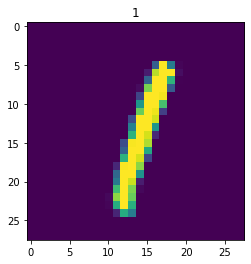

In [ ]:
plt.title(y_classes[5])
plt.imshow(test_images[5])

In [ ]:
y_pred=np.round(y_pred)

array([[0.11045607, 0.11700821, 0.09262078, ..., 0.10554646, 0.10023309,
        0.09451049],
       [0.11233509, 0.11641664, 0.09290677, ..., 0.10313841, 0.0999195 ,
        0.0942086 ],
       [0.11013671, 0.11900863, 0.09252157, ..., 0.10491689, 0.09977479,
        0.09442116],
       ...,
       [0.1099337 , 0.11652096, 0.09228905, ..., 0.10415909, 0.10006519,
        0.09402449],
       [0.1109815 , 0.11527959, 0.09184102, ..., 0.10289025, 0.10021061,
        0.09482065],
       [0.11229502, 0.11672255, 0.09265729, ..., 0.10261215, 0.09915321,
        0.09381711]], dtype=float32)

In [ ]:
y_classes[0]

1

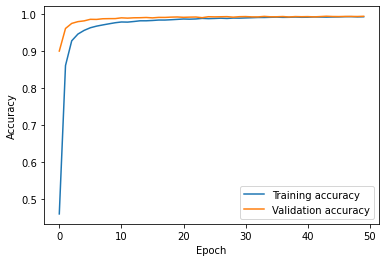

In [ ]:
import matplotlib.pyplot as plt
train_loss=history1.history['accuracy']
val_loss=history1.history['val_accuracy']
plt.plot(train_loss,label='Training accuracy')
plt.plot(val_loss,label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

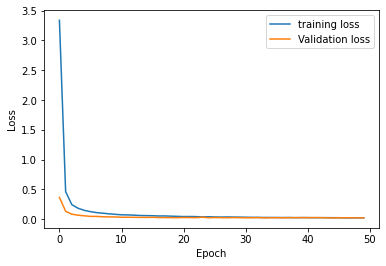

In [ ]:
import matplotlib.pyplot as plt
train_loss=history1.history['loss']
val_loss=history1.history['val_loss']
plt.plot(train_loss,label='training loss')
plt.plot(val_loss,label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

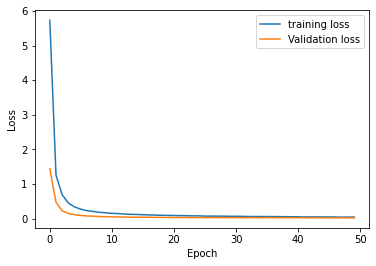

In [ ]:
import matplotlib.pyplot as plt
train_loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(train_loss,label='training loss')
plt.plot(val_loss,label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()